# Исследование объявлений о продаже квартир

## План выполнения проекта:
### - Загрузка и изучение данных.
### - Предобработка данных.
### - Расчет и добавление в таблицу новых столбцов:
* цена квадратного метра, 
* день недели, месяц и год публикации объявления, 
* категория этажа квартиры, 
* соотношение жилой и общей площади,
* отношение площади кухни к общей.

### - Исследовательский анализ данных.
### - Вывод.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь данные в более понятном виде. Применим метод info():

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

После открытия файла с данными data и применения к нему метода info(), видим, что в таблице 23699 строки и 22 столбца.

Cтолбцы с нулевыми/пропущенными значениями:

    "высота потолков" ('ceiling_height')
    "всего этажей в доме" ('floors_total')
    "жилая площадь в квадратных метрах" ('living_area')
    "апартаменты" ('is_apartment') 
    "площадь кухни" ('kitchen_area')  
    "число балконов" ('balcony')  
    "название населённого пункта" ('locality_name')
    "расстояние до ближайшего аэропорта в метрах" ('airports_nearest') 
    "расстояние до центра города" ('cityCenters_nearest') 
    "число парков в радиусе 3 км" ('parks_around3000')
    "расстояние до ближайшего парка" ('parks_nearest')
    "число водоёмов в радиусе 3 км" ('ponds_around3000') 
    "расстояние до ближайшего водоёма" ('ponds_nearest')
    "сколько дней было размещено объявление" ('days_exposition')

Используются типы данных bool(2), float64(14), int64(3), object(3)

### Шаг 2. Предобработка данных

### Определим и изучим пропущенные значения:

Внимательно изучив задачи проекта, пришли к выводу, что некоторые столбцы не нужно обрабатывать, т.к. они не будут использоваться для дальнейшего анализа.

Не будем обрабатывать:

    "апартаменты" ('is_apartment')
    "число балконов" ('balcony')
    "расстояние до ближайшего аэропорта в метрах" ('airports_nearest')
    "число парков в радиусе 3 км" ('parks_around3000') 
    "расстояние до ближайшего парка" ('parks_nearest') 
    "число водоёмов в радиусе 3 км" ('ponds_around3000') 
    "расстояние до ближайшего водоёма" ('ponds_nearest') 
    
    
Нужно обработать: 

    "жилая площадь в квадратных метрах" ('living_area')
    "площадь кухни" ('kitchen_area')
    "высота потолков" ('ceiling_height')
    "сколько дней было размещено объявление" ('days_exposition')
    "расстояние до центра города" ('cityCenters_nearest') 
    "всего этажей в доме" ('floors_total')
    "название населённого пункта" ('locality_name')

Удалим из таблицы ненужные столбцы, чтобы было удобнее ей пользоваться. 

In [4]:
data.drop('total_images', axis=1, inplace=True)
data.drop('ponds_nearest' , axis=1, inplace=True)
data.drop('ponds_around3000', axis=1, inplace=True)
data.drop('is_apartment', axis=1, inplace=True)
data.drop('balcony' , axis=1, inplace=True)
data.drop('airports_nearest', axis=1, inplace=True)
data.drop('parks_around3000', axis=1, inplace=True)
data.drop('parks_nearest' , axis=1, inplace=True)
data.drop('studio' , axis=1, inplace=True)
data.drop('open_plan' , axis=1, inplace=True)
data

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition
0,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,25.00,Санкт-Петербург,16028.0,NaN
1,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,11.00,посёлок Шушары,18603.0,81.0
2,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,8.30,Санкт-Петербург,13933.0,558.0
3,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,Санкт-Петербург,6800.0,424.0
4,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,41.00,Санкт-Петербург,8098.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,13.83,Санкт-Петербург,4232.0,NaN
23695,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,8.50,Тосно,NaN,45.0
23696,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,село Рождествено,NaN,NaN
23697,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,23.30,Санкт-Петербург,10364.0,602.0


#### Найдем нулевые значения в стобце 'living_area':

In [5]:
data[data['living_area'].isnull()].head() # найдем нулевые значения в стобце 'living_area'

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,Санкт-Петербург,6800.0,424.0
7,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,18.9,Санкт-Петербург,11634.0,NaN
30,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,Коммунар,NaN,63.0
37,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,поселок городского типа Красный Бор,NaN,196.0
44,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,Санкт-Петербург,11603.0,NaN


In [6]:
print(data[data['living_area'].isnull()].count()) # посчитаем количество пропусков в столбце 'living_area'

last_price              1903
total_area              1903
first_day_exposition    1903
rooms                   1903
ceiling_height           797
floors_total            1870
living_area                0
floor                   1903
kitchen_area             439
locality_name           1898
cityCenters_nearest     1280
days_exposition         1705
dtype: int64


Заполним пропуски следующим образом: разделим объявления на группы по общей площади, для каждой группы посчитаем медиану в 'living_area' и заполним ими пропуски.

Сначала разобьем 'total_area' на группы:

In [7]:
data.sort_values('total_area')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition
19904,2400000.0,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,Санкт-Петербург,964.0,200.0
17961,1400000.0,13.0,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,NaN,Санкт-Петербург,15945.0,410.0
19546,1850000.0,13.0,2019-03-11T00:00:00,1,3.40,5.0,NaN,2,NaN,Санкт-Петербург,5483.0,24.0
19807,3800000.0,13.0,2018-07-04T00:00:00,1,NaN,5.0,10.0,3,NaN,Санкт-Петербург,1242.0,9.0
19558,1686000.0,13.2,2018-12-17T00:00:00,1,NaN,5.0,NaN,1,NaN,Санкт-Петербург,4165.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5358,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,100.0,Санкт-Петербург,4666.0,14.0
15651,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,70.0,Санкт-Петербург,5297.0,111.0
3117,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,60.0,Санкт-Петербург,4972.0,NaN
12859,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,19.5,Санкт-Петербург,4972.0,NaN


In [8]:
def total_area_group(area):
    if area <= 20:
        return '< 20'
    if 20 < area <= 50:
        return '20-50'
    if 50 < area <= 100:
        return '50-100'
    if 100 < area <= 200:
        return '100-200'
    if 200 < area < 500:
        return '200-500'
    if area >= 500:
        return '>=500'
    
data['total_area_group'] = data['total_area'].apply(total_area_group)
data.head() 

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,25.0,Санкт-Петербург,16028.0,NaN,100-200
1,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,11.0,посёлок Шушары,18603.0,81.0,20-50
2,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,8.3,Санкт-Петербург,13933.0,558.0,50-100
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,Санкт-Петербург,6800.0,424.0,100-200
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,41.0,Санкт-Петербург,8098.0,121.0,50-100


Посчитаем медиану по каждой группе и заменим пропуски:

In [9]:
for i in data['total_area_group'].unique():
    living_area_mediana = data.loc[data['total_area_group']==i, 'living_area'].median()
    data.loc[data['total_area_group']==i, 'living_area'] = data.loc[data['total_area_group']==i, 'living_area'].fillna(living_area_mediana)

Проверим не осталось ли пропусков в столбце 'living_area':

In [10]:
print(data[data['living_area'].isnull()].count())

last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
kitchen_area            0
locality_name           0
cityCenters_nearest     0
days_exposition         0
total_area_group        0
dtype: int64


#### Найдем нулевые значения в стобце 'kitchen_area':

In [11]:
data[data['kitchen_area'].isnull()].head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,72.2,9,NaN,Санкт-Петербург,6800.0,424.0,100-200
30,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,18.4,2,NaN,Коммунар,NaN,63.0,20-50
37,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,18.4,1,NaN,поселок городского типа Красный Бор,NaN,196.0,20-50
44,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,18.4,3,NaN,Санкт-Петербург,11603.0,NaN,20-50
59,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13.0,18.4,13,NaN,Санкт-Петербург,14501.0,336.0,20-50


In [12]:
print(data[data['kitchen_area'].isnull()].count())

last_price              2278
total_area              2278
first_day_exposition    2278
rooms                   2278
ceiling_height           940
floors_total            2231
living_area             2278
floor                   2278
kitchen_area               0
locality_name           2269
cityCenters_nearest     1563
days_exposition         2075
total_area_group        2278
dtype: int64


Заполним пропуски по аналогии со столбцом 'living_area'.

In [13]:
for i in data['total_area_group'].unique():
    kitchen_area_mediana = data.loc[data['total_area_group']==i, 'kitchen_area'].median()
    data.loc[data['total_area_group']==i, 'kitchen_area'] = data.loc[data['total_area_group']==i, 'kitchen_area'].fillna(kitchen_area_mediana)

Проверим не осталось ли пропусков в столбце 'kitchen_area':

In [14]:
print(data[data['kitchen_area'].isnull()].count())

last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
kitchen_area            0
locality_name           0
cityCenters_nearest     0
days_exposition         0
total_area_group        0
dtype: int64


#### Найдем пропуски в столбце 'ceiling_height':

In [15]:
data[data['ceiling_height'].isnull()].head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group
1,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,11.0,посёлок Шушары,18603.0,81.0,20-50
2,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,8.3,Санкт-Петербург,13933.0,558.0,50-100
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,72.2,9,16.0,Санкт-Петербург,6800.0,424.0,100-200
5,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,9.1,городской посёлок Янино-1,NaN,55.0,20-50
6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,14.4,посёлок Парголово,19143.0,155.0,20-50


In [16]:
print(data[data['ceiling_height'].isnull()].count())

last_price              9195
total_area              9195
first_day_exposition    9195
rooms                   9195
ceiling_height             0
floors_total            9118
living_area             9195
floor                   9195
kitchen_area            9195
locality_name           9160
cityCenters_nearest     6620
days_exposition         8467
total_area_group        9195
dtype: int64


Пропущенных значений очень много, удалять их нежелательно.

С помощью метода **describe()** изучим список характерных значений в столбце 'ceiling_height':

In [17]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Кроме пропусков в столбце "высота потолков" ('ceiling_height') есть еще и странные значения. Например, минимальная высота потолков 1м, максимальная - 100м. Это нереальные значения, квартир с такой высотой потолков не может быть.

Чтобы заполнить пропуски, посчитаем медиану, но сначала нужно отбросить нереальные значения. 

Нереальные значения высоты потолков:

In [18]:
data.query('ceiling_height <= 2').head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group
552,2999000.0,33.50,2017-03-30T00:00:00,1,2.0,15.0,17.5,6,6.5,Санкт-Петербург,11746.0,270.0,20-50
2572,2400000.0,62.00,2018-12-27T00:00:00,3,2.0,5.0,40.0,4,6.0,Луга,NaN,NaN,50-100
4212,2120000.0,35.43,2017-12-18T00:00:00,1,2.0,18.0,16.6,9,8.8,Тосно,NaN,36.0,20-50
5712,1500000.0,42.80,2017-08-14T00:00:00,2,1.2,2.0,27.5,1,5.2,городской посёлок Мга,NaN,248.0,20-50
5850,1650000.0,35.50,2018-05-29T00:00:00,1,2.0,5.0,18.4,5,8.0,Луга,NaN,100.0,20-50


In [19]:
data.query('ceiling_height >= 5').head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group
355,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,10.0,Гатчина,NaN,259.0,50-100
464,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,21.1,Санкт-Петербург,6655.0,578.0,200-500
1026,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,63.0,Санкт-Петербург,4785.0,NaN,200-500
1053,550000.0,29.0,2018-02-01T00:00:00,1,5.0,3.0,18.4,1,8.0,Бокситогорск,NaN,6.0,20-50
1388,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,157.0,6,26.0,Санкт-Петербург,6934.0,719.0,200-500


Посчитаем количество таких значений:

In [20]:
len(data.query('ceiling_height <= 2'))

14

In [21]:
len(data.query('ceiling_height >= 5'))

37

Их всего 51, можно отбросить. Посчитаем медиану для всех значений кроме этих нереальных и заполним пропуски этой медианой.

In [22]:
drop_ceiling_height_data = data.query('2 < ceiling_height < 5')

In [23]:
drop_ceiling_height_data['ceiling_height'].median()

2.65

Итак медиана равна 2.65. 

После применения метода describe(), видим что если не отбрасывать нереальные значения, медиана равна 2.65. Странно, скорее всего  из-за того что нереальных значений было очень мало по сравнению с общим количеством данных.

Заменим пропуски на медиану:

In [24]:
data['ceiling_height'].fillna((drop_ceiling_height_data['ceiling_height'].median()), inplace=True)

Проверим не осталось ли пропусков в столбце 'ceiling_height':

In [25]:
print(data[data['ceiling_height'].isnull()].count())

last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
kitchen_area            0
locality_name           0
cityCenters_nearest     0
days_exposition         0
total_area_group        0
dtype: int64


#### Найдем пропуски в столбце 'days_exposition':

In [26]:
data[data['days_exposition'].isnull()].head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,25.0,Санкт-Петербург,16028.0,NaN,100-200
7,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,39.6,22,18.9,Санкт-Петербург,11634.0,NaN,50-100
44,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,18.4,3,8.0,Санкт-Петербург,11603.0,NaN,20-50
45,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,7.0,Санкт-Петербург,12872.0,NaN,50-100
46,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,8.3,Санкт-Петербург,12702.0,NaN,50-100


In [27]:
print(data[data['days_exposition'].isnull()].count())

last_price              3181
total_area              3181
first_day_exposition    3181
rooms                   3181
ceiling_height          3181
floors_total            3172
living_area             3181
floor                   3181
kitchen_area            3181
locality_name           3180
cityCenters_nearest     2315
days_exposition            0
total_area_group        3181
dtype: int64


Изучим данные в столбце 'days_exposition' с помощью метода **describe()**:

In [28]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Вроде ничего необычного, заполним пропуски медианой:

In [29]:
data['days_exposition'].median()

95.0

In [30]:
data['days_exposition'].fillna((data['days_exposition'].median()), inplace=True)

Проверим не осталось ли пропусков в столбце 'days_exposition':

In [31]:
print(data[data['days_exposition'].isnull()].count())

last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
kitchen_area            0
locality_name           0
cityCenters_nearest     0
days_exposition         0
total_area_group        0
dtype: int64


Можно попробовать посчитать медиану по-другому, например, разбить данные на группы по сезону добавления объявления и для каждого сезона посчитать медиану.

#### Найдем пропуски в столбце 'cityCenters_nearest':

In [32]:
data[data['cityCenters_nearest'].isnull()].head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group
5,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,9.10,городской посёлок Янино-1,NaN,55.0,20-50
8,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,8.81,посёлок Мурино,NaN,189.0,20-50
12,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,9.00,Сертолово,NaN,90.0,50-100
22,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,11.00,деревня Кудрово,NaN,60.0,50-100
30,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,18.40,2,8.00,Коммунар,NaN,63.0,20-50


In [33]:
print(data[data['cityCenters_nearest'].isnull()].count())

last_price              5519
total_area              5519
first_day_exposition    5519
rooms                   5519
ceiling_height          5519
floors_total            5509
living_area             5519
floor                   5519
kitchen_area            5519
locality_name           5511
cityCenters_nearest        0
days_exposition         5519
total_area_group        5519
dtype: int64


В столбце 'cityCenters_nearest'  5519 пропусков. Возможно расстояние до центра просто не было указано при размещении объявления.

Подходящего значения на замену нет. Думаю в этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать. Сохраним в отдельный датасет строки где нет пропусков в 'cityCenters_nearest'.

In [34]:
drop_cityCenter_data = data.dropna(subset=['cityCenters_nearest']).copy()

Проверим сколько строк объявлеий для Санкт-Петербурга мы удалили вмест с пропусками в  'cityCenters_nearest':

In [35]:
len(drop_cityCenter_data.query('locality_name == "Санкт-Петербург"'))

15660

In [36]:
len(data.query('locality_name == "Санкт-Петербург"'))

15721

После удаления строк с пропущенными значениями в 'cityCenters_nearest' для Санкт-Петербурга почти все строки остались.

#### Найдем нулевые/пропущенные значения в столбце ('floors_total'):

In [37]:
data[data['floors_total'].isnull()].head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group
186,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,12.00,Санкт-Петербург,12373.0,49.0,50-100
237,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,8.00,Санкт-Петербург,17369.0,251.0,20-50
457,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,10.63,Санкт-Петербург,8322.0,727.0,50-100
671,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,16.80,Санкт-Петербург,17369.0,123.0,50-100
1757,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,18.40,9,8.00,Санкт-Петербург,11618.0,77.0,20-50


Посчитаем количество пропусков в столбце 'floors_total':

In [38]:
print(data[data['floors_total'].isnull()].count())

last_price              86
total_area              86
first_day_exposition    86
rooms                   86
ceiling_height          86
floors_total             0
living_area             86
floor                   86
kitchen_area            86
locality_name           85
cityCenters_nearest     76
days_exposition         86
total_area_group        86
dtype: int64


Найдено 86 пропусков, это не так много, можно эти cтроки удалить:

In [39]:
data.dropna(subset = ['floors_total'],inplace = True)

Проверим не осталось ли пропусков в столбце 'floors_total':

In [40]:
print(data[data['floors_total'].isnull()].count())

last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
kitchen_area            0
locality_name           0
cityCenters_nearest     0
days_exposition         0
total_area_group        0
dtype: int64


#### Найдем пропуски в столбце 'locality_name':

In [41]:
data[data['locality_name'].isnull()].head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group
1097,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,8.8,NaN,4258.0,147.0,50-100
2033,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4.0,42.6,2,18.6,NaN,NaN,34.0,50-100
2603,3351765.0,42.7,2015-09-20T00:00:00,1,2.65,24.0,15.6,3,10.7,NaN,17369.0,276.0,20-50
2632,5130593.0,62.4,2015-10-11T00:00:00,2,2.65,24.0,33.1,21,8.2,NaN,17369.0,256.0,50-100
3574,4200000.0,46.5,2016-05-28T00:00:00,2,2.65,5.0,30.8,5,6.5,NaN,8127.0,45.0,20-50


In [42]:
print(data[data['locality_name'].isnull()].count())

last_price              48
total_area              48
first_day_exposition    48
rooms                   48
ceiling_height          48
floors_total            48
living_area             48
floor                   48
kitchen_area            48
locality_name            0
cityCenters_nearest     40
days_exposition         48
total_area_group        48
dtype: int64


Пропусков мало можно отбросить:

In [43]:
data.dropna(subset = ['locality_name'],inplace = True)

Проверим не осталось ли пропусков в столбце 'locality_name':

In [44]:
print(data[data['locality_name'].isnull()].count())

last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
kitchen_area            0
locality_name           0
cityCenters_nearest     0
days_exposition         0
total_area_group        0
dtype: int64


#### Причины, которые могли привести к пропускам  и ошибкам в данных.

Пропуски могли появиться, например, если данные не указали при размещении объявления.

Также пропуски и ошибки могли появиться, например, при выгрузке не всех данных или выгрузке не тех данных. Могли быть ошибки в  алгоритмах расчета или данные выгружены не в том формате.

### Приведем данные к нужным типам.

В столбцах ***'total_area'*** и ***'last_price'*** вещественный тип данных. Для удобства заменим вещественный тип данных на целочисленный:

In [45]:
data['last_price'] = data['last_price'].astype('int') # воспользуемся методом astype()

In [46]:
data['total_area'] = data['total_area'].astype('int') 

Также поступим со столбцом ***'floors_total'***:

In [47]:
data['floors_total'] = data['floors_total'].astype('int') 

Заменим данные на целочисленный тип в столбцах 'living_area' и 'kitchen_area', 'days_exposition':

In [48]:
data['living_area'] = data['living_area'].astype('int')

In [49]:
data['kitchen_area'] = data['kitchen_area'].astype('int')

In [50]:
data['days_exposition'] = data['days_exposition'].astype('int')

Также поступим со столбцом 'cityCenters_nearest'. Т.к. здесь есть пропущенные значения, используем такую конструкцию:

In [51]:
data.loc[data['cityCenters_nearest'].notnull(), 'cityCenters_nearest'] = data.loc[data['cityCenters_nearest'].notnull(), 'cityCenters_nearest'].apply(int)
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int32')

Дату публикации, столбец ***('first_day_exposition')*** с помощью метода ** to_datetime()**  превратим в более понятный вид. 

Переводим строковые значения столбца 'first_day_exposition' в формат datetime:

In [52]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим, как изменился тип выгруженных дат:

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23565 non-null int64
total_area              23565 non-null int64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null int64
floor                   23565 non-null int64
kitchen_area            23565 non-null int64
locality_name           23565 non-null object
cityCenters_nearest     18064 non-null Int32
days_exposition         23565 non-null int64
total_area_group        23565 non-null object
dtypes: Int32(1), datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 2.4+ MB


Теперь у нас в данных такие типы данных: Int32(1), datetime64[ns](1), float64(1), int64(8), object(2)

### Шаг 3. Посчитайте и добавьте в таблицу

#### Посчитаем и добавим в таблицу цену квадратного метра.

Чтобы посчитать цену за квадратный метр нам понадобятся столбцы 'total_area' и 'last_price'. Сначала проверим нет ли в них необычных значений, артефактов или ошибок в данных. 

Мы уже знаем, что пропущенных/нулевых значений в них нет. 

С помощью метода describe() изучим список характерных значений в столбце 'total_area':

In [54]:
data['total_area'].describe()

count    23565.000000
mean        60.095226
std         35.668758
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

Минимальная площадь 12м2, максимальная 900м2. Бывают и такие маленькие квартиры и такие большие.

С помощью метода describe() изучим список характерных значений в столбце 'last_price':

In [55]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [56]:
data.sort_values(by='last_price') # отсортируем по столбцу 'last_price' по возрастанию

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group
8793,12190,109,2019-03-20,2,2.75,25,32,25,40,Санкт-Петербург,9176,8,100-200
17456,430000,30,2019-04-22,1,2.65,2,16,1,6,Сланцы,NaN,95,20-50
14911,430000,54,2018-06-26,2,2.65,3,39,3,10,посёлок станции Свирь,NaN,44,50-100
16274,440000,40,2018-07-10,1,2.65,5,18,1,8,деревня Старополье,NaN,45,20-50
9581,450000,43,2018-08-31,2,2.65,5,30,3,5,деревня Старополье,NaN,96,20-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,300000000,618,2017-12-18,7,3.40,7,258,5,70,Санкт-Петербург,5297,111,>=500
1436,330000000,190,2018-04-04,3,3.50,7,95,5,40,Санкт-Петербург,1197,233,100-200
14706,401300000,401,2016-02-20,5,2.65,9,204,9,24,Санкт-Петербург,2389,393,200-500
19540,420000000,900,2017-12-06,12,2.80,25,409,25,112,Санкт-Петербург,7877,106,>=500


Минимальная цена 12190, максимальная 763000000. 

Стоимость квартиры 12190 подозрительная, к тому же как видно после применения метода sort_values() эта стоимость сильно выбивается от остальных. Эта квартира площадью 109м2 и стоит 12190.

Посчитаем цену за квадратный метр и добавим ее в таблицу:

In [57]:
data['price_per_meter'] = data['last_price'] / data['total_area']

Заменим вещественный тип данных на целочисленный в столбце 'price_per_meter'.

In [58]:
data['price_per_meter'] = data['price_per_meter'].astype('int') # переведем значения в целочисленный тип данных

In [59]:
data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group,price_per_meter
0,13000000,108,2019-03-07,3,2.70,16,51,8,25,Санкт-Петербург,16028,95,100-200,120370
1,3350000,40,2018-12-04,1,2.65,11,18,1,11,посёлок Шушары,18603,81,20-50,83750
2,5196000,56,2015-08-20,2,2.65,5,34,4,8,Санкт-Петербург,13933,558,50-100,92785
3,64900000,159,2015-07-24,3,2.65,14,72,9,16,Санкт-Петербург,6800,424,100-200,408176
4,10000000,100,2018-06-19,2,3.03,14,32,13,41,Санкт-Петербург,8098,121,50-100,100000


#### Посчитаем и добавим в таблицу день недели, месяц и год публикации объявления.

In [60]:
data['weekday'] = data['first_day_exposition'].dt.weekday # добавляем день недели

In [61]:
data['month'] = data['first_day_exposition'].dt.month # добавляем месяц

In [62]:
data['year'] = data['first_day_exposition'].dt.year # добавляем год

In [63]:
data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group,price_per_meter,weekday,month,year
0,13000000,108,2019-03-07,3,2.70,16,51,8,25,Санкт-Петербург,16028,95,100-200,120370,3,3,2019
1,3350000,40,2018-12-04,1,2.65,11,18,1,11,посёлок Шушары,18603,81,20-50,83750,1,12,2018
2,5196000,56,2015-08-20,2,2.65,5,34,4,8,Санкт-Петербург,13933,558,50-100,92785,3,8,2015
3,64900000,159,2015-07-24,3,2.65,14,72,9,16,Санкт-Петербург,6800,424,100-200,408176,4,7,2015
4,10000000,100,2018-06-19,2,3.03,14,32,13,41,Санкт-Петербург,8098,121,50-100,100000,1,6,2018


#### Посчитаем и добавим в таблицу этаж квартиры: варианты — первый, последний, другой.

Для этого нам понадобятся столбцы 'floor' и 'floors_total'. Проверим нет ли в них каких-нибудь странных значений.

С помощью метода describe() изучим список характерных значений в столбце 'floors_total' и 'floor':

In [64]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [65]:
data['floor'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Проверим, нет ли где-нибудь этажа больше, чем всего этажей в доме:

In [66]:
data.query('floor > floors_total')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group,price_per_meter,weekday,month,year


Ничего необычного не нашли.

Разобьем этажи на группы - первый, последний, другой:

In [67]:
def floor_group(floor):
    if floor == 1:
        return 'первый'
    if floor == ['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_group'] = data['floor'].apply(floor_group)
data.head()              

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group,price_per_meter,weekday,month,year,floor_group
0,13000000,108,2019-03-07,3,2.70,16,51,8,25,Санкт-Петербург,16028,95,100-200,120370,3,3,2019,другой
1,3350000,40,2018-12-04,1,2.65,11,18,1,11,посёлок Шушары,18603,81,20-50,83750,1,12,2018,первый
2,5196000,56,2015-08-20,2,2.65,5,34,4,8,Санкт-Петербург,13933,558,50-100,92785,3,8,2015,другой
3,64900000,159,2015-07-24,3,2.65,14,72,9,16,Санкт-Петербург,6800,424,100-200,408176,4,7,2015,другой
4,10000000,100,2018-06-19,2,3.03,14,32,13,41,Санкт-Петербург,8098,121,50-100,100000,1,6,2018,другой


In [68]:
data['floor_group'].value_counts()

другой    20656
первый     2909
Name: floor_group, dtype: int64

Видим, что у нас есть категории этажей "первый" и "другой". Но нет ни одной квартиры на последнем этаже.

#### Посчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [69]:
data['ratio_living_to _total'] = data['living_area'] / data['total_area']

In [70]:
data['ratio_kitchen_to _total'] = data['kitchen_area'] / data['total_area']

In [71]:
data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group,price_per_meter,weekday,month,year,floor_group,ratio_living_to _total,ratio_kitchen_to _total
0,13000000,108,2019-03-07,3,2.70,16,51,8,25,Санкт-Петербург,16028,95,100-200,120370,3,3,2019,другой,0.472222,0.231481
1,3350000,40,2018-12-04,1,2.65,11,18,1,11,посёлок Шушары,18603,81,20-50,83750,1,12,2018,первый,0.450000,0.275000
2,5196000,56,2015-08-20,2,2.65,5,34,4,8,Санкт-Петербург,13933,558,50-100,92785,3,8,2015,другой,0.607143,0.142857
3,64900000,159,2015-07-24,3,2.65,14,72,9,16,Санкт-Петербург,6800,424,100-200,408176,4,7,2015,другой,0.452830,0.100629
4,10000000,100,2018-06-19,2,3.03,14,32,13,41,Санкт-Петербург,8098,121,50-100,100000,1,6,2018,другой,0.320000,0.410000


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

##### Построим гистограмму и изучим значения  общей площади:

In [72]:
data['total_area'].describe()

count    23565.000000
mean        60.095226
std         35.668758
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

Посмотрим сколько квартир общей площадью меньше 20м2:

In [73]:
len(data.query('total_area < 20'))

27

Посмотрим сколько квартир общей площадью больше 500м2:

In [74]:
len(data.query('total_area > 500'))

7

Очень их мало.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb736be4d50>]],
      dtype=object)

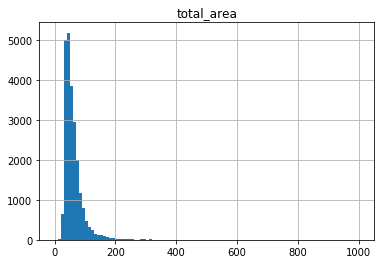

In [75]:
data.hist('total_area', bins=100, range=(0,1000))

Уменьшим диапазон до 300, чтобы увидеть более наглядную гистограмму:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7378451d0>]],
      dtype=object)

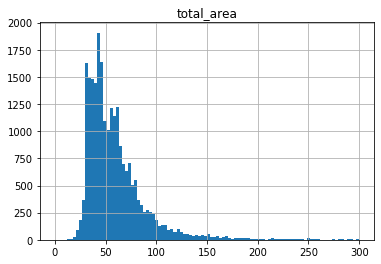

In [76]:
data.hist('total_area', bins=100, range=(0,300))

Изучив данные видим, что минимальная площадь квартиры 12м2, максимальная 900м2. Среднее значение 60 м2, медиана 52м2. Основная часть квартир имеет площадь от 40 до 69 м2, это первый и третий квартили.

Стандартное отклонение  35.6. Данные не однородны, есть длинный хвост с площадью квартиры до 900м2.

##### Построим гистограмму и изучим значения цены продажи:

In [77]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb730c194d0>]],
      dtype=object)

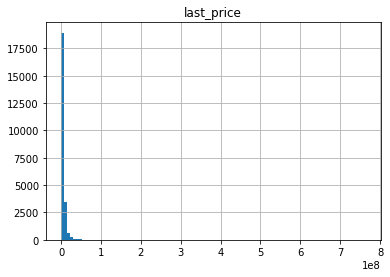

In [78]:
data.hist('last_price', bins=100, range=(0,763000000))

Для наглядности уменьшим диапазон до 10000000:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb730ab3910>]],
      dtype=object)

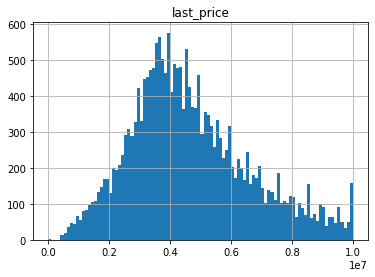

In [79]:
data.hist('last_price', bins=100, range=(0,10000000))

Изучив данные видим, что минимальная цена квартиры 12190, максимальная 763000000. Среднее значение 6540058, медиана 4646000. Основная часть квартир имеет площадь от 3400000 до 6790000, это первый и третий квартили.

Стандартное отклонение  10910930. Это значит что данные очень неоднородны, имеются выбросы.

##### Построим гистограмму и изучим значения  количества комнат:

In [80]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [81]:
len(data.query('rooms == 0'))

194

Есть объявления, в которых указано количество комнат 0. Таких объявлений 194.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb73087dc90>]],
      dtype=object)

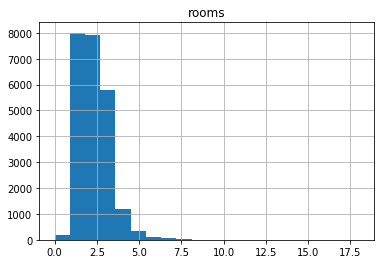

In [82]:
data.hist('rooms', bins=20, range=(0,18))

Изучив данные видим, что минимальное количество комнат 0, максимальное 19. Среднее значение 2, медиана 2. Основная часть квартир имеет количество комнат от 1 до 3, это первый и третий квартили. Стандартное отклонение 1.07.

##### Построим гистограмму и изучим значения высоты потолков:

Здесь есть нереальные значения высоты потолка 1 м и 100м. Ранее мы удалили нереальные значения высоты потолков и сохранили оставшиеся данные в drop_ceiling_height_data ( с условием '2 < ceiling_height < 5')

Сравним характерные значения в **data** и в **drop_ceiling_height_data**:

In [83]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [84]:
drop_ceiling_height_data['ceiling_height'].describe()

count    14453.000000
mean         2.725833
std          0.270519
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.900000
Name: ceiling_height, dtype: float64

Совпадают среднее значение и медиана, остальные различаются.

Стандартное отклонение характеризует разброс величин, для **data['ceiling_height']** равно 0.99, а для **drop_ceiling_height_data['ceiling_height']** равно 0.27. Это говорит о том, что в drop_ceiling_height_data данные более однородные, так как мы избавились от выбросов.

Сравним гистограммы **data['ceiling_height']** и **drop_ceiling_height_data['ceiling_height']**:

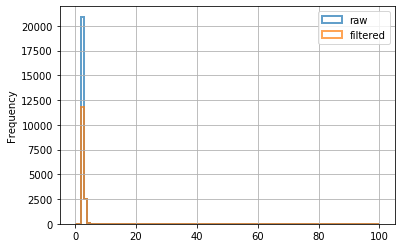

In [85]:
ax = data.plot(kind='hist', y='ceiling_height', histtype='step', range=(0, 100), bins=100, linewidth=2, alpha=0.7, label='raw')
drop_ceiling_height_data.plot(kind='hist', y='ceiling_height', histtype='step', range=(0, 100), bins=100, linewidth=2, alpha=0.7, label='filtered', ax=ax, grid=True, legend=True)

Для наглядности уменьшим диапазон до 5:

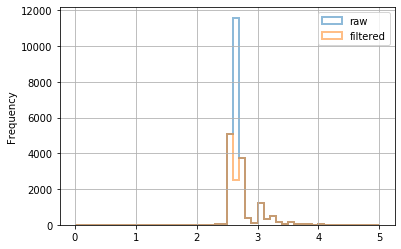

In [86]:
ax = data.plot(kind='hist', y='ceiling_height', histtype='step', range=(0, 5), bins=50, linewidth=2, alpha=0.5, label='raw')
drop_ceiling_height_data.plot(kind='hist', y='ceiling_height', histtype='step', range=(0, 5), bins=50, linewidth=2, alpha=0.5, label='filtered', ax=ax, grid=True, legend=True)

##### Изучим время продажи квартиры.

In [87]:
data['days_exposition'].describe()

count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи 169 дней, медиана 95 дней. Миниальное время продажи 1 день, максимальное 1580 дней. В основном продавали от 45 до 198 дней. Стандартное отклонение 206, значит данные неоднородны и, возможно, есть выбросы.

Построим гистограмму:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb730725990>]],
      dtype=object)

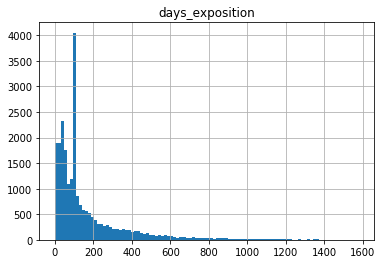

In [88]:
data.hist('days_exposition', bins=100, range=(0,1580))

Видим, что есть длинный хвост до 1580 дней.

Для наглядности уменьшим диапазон до 800:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb730725510>]],
      dtype=object)

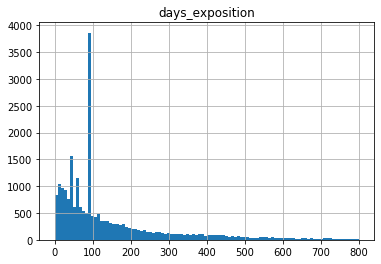

In [89]:
data.hist('days_exposition', bins=100, range=(0,800))

In [90]:
len(data.query('days_exposition < 5'))

335

In [91]:
len(data.query('days_exposition > 800'))

587

Обычно продажа занимает 95 дней. 

Будем считать, что продажи прошли быстро, если **'days_exposition < 5'**. А необычайно долго, если **'days_exposition > 800'**. Так как время продажи квартиры более 800 дней всречалось намного реже.

#### Уберем редкие и выбивающиеся значения. 

Мы нашли редкие и выбивающиеся значения в столбцах **'last_price'**, **'rooms'**, **'ceiling_height'**, **'days_exposition'**.

Построим диаграммы размаха в цикле:

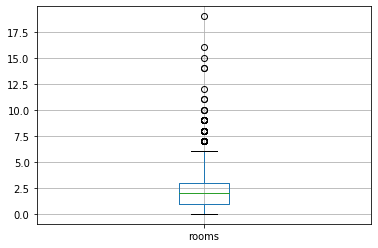

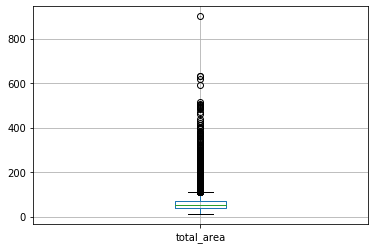

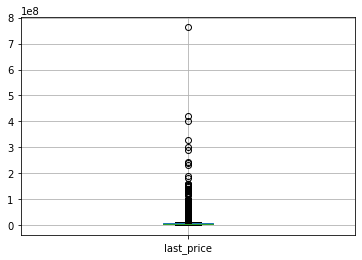

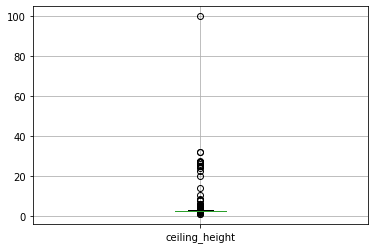

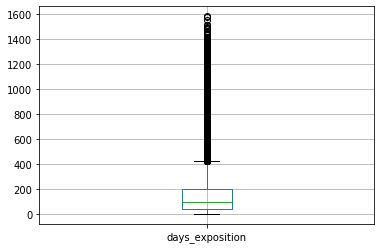

In [92]:
import matplotlib.pyplot as plt 
names = ['rooms', 'total_area', 'last_price', 'ceiling_height', 'days_exposition']
for name in names:
    plt.figure()
    plt.title
    data.boxplot(name)       

Уберем редкие и выбивающиеся значений. Будем считать редкими все значения не попавшие в 2,5-3 квартиля.

    - для столбца 'rooms' редкими будут значения больше 11 комнат ( примерно 3  квартиля).

    - для столбца 'total_area'редкими будут значения больше 600 м2 (больше 600м2 точки намного реже на графике).

    - для столбца 'last_price'редкими будут значения больше 200000000 (больше 200000000 точки намного реже на графике).

    - для столбца 'ceiling_height'редкими будут значения больше 5м (больше 5м точки намного реже на графике).

    - для столбца 'days_exposition'редкими будут значения больше 800 (примерно 3 квартиля)


Проверим сколько строк мы собираемся удалять:

In [93]:
len(data.query('last_price > 200000000'))

9

In [94]:
len(data.query('total_area > 600'))

4

In [95]:
len(data.query('rooms > 11'))

6

In [96]:
len(data.query('ceiling_height > 5'))

36

In [97]:
len(data.query('days_exposition > 800'))

587

Перезапишем данные без выбросов в data и drop_cityCenter_data.

In [98]:
data = data.query('(last_price < 200000000) and (total_area < 600) and (rooms < 11) and (ceiling_height < 5) and (days_exposition < 800)').copy()

In [99]:
drop_cityCenter_data =  drop_cityCenter_data.query('(last_price < 200000000) and (total_area < 600) and (rooms < 11) and (ceiling_height < 5) and (days_exposition < 800)').copy()

#### Какие факторы больше всего влияют на стоимость квартиры? 

##### Изучим зависимость цены продажи от общей площади.

Построим график зависимости цены продажи от общей площади, используем тип графика — scatter:

In [1]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True)

##### Изучим зависимость цены продажи от числа комнат.

Построим график зависимости цены продажи от количества комнат, используем тип графика — scatter:

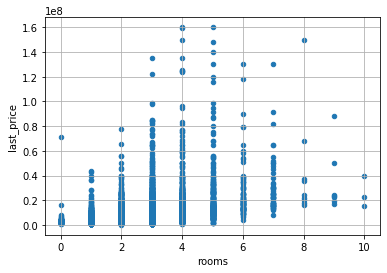

In [101]:
data.plot(x='rooms', y='last_price', kind='scatter', grid=True)

##### Изучим зависимость цены продажи от удаленности от центра.

Построим график зависимости цены продажи от удаленности от центра, используем тип графика — scatter:

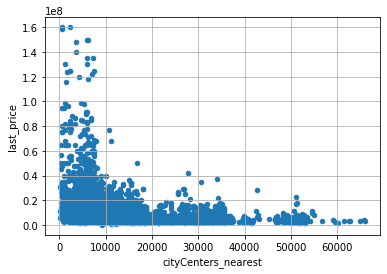

In [102]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True)

Сравним график зависимости цены продажи от удаленности от центра **data** (из общих данных) с данными, в которых удалены строки с пропусками в **'cityCenters_nearest'**:

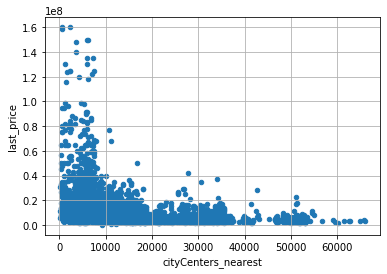

In [103]:
drop_cityCenter_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True)

Видим, что вид графиков похож. Значит можно использовать **drop_cityCenter_data**

###### Посчитаем коэффиценты корреляции:

In [104]:
data['last_price'].corr(data['total_area'])

0.73583845634551

In [105]:
data['last_price'].corr(data['rooms'])

0.4390478152525423

In [106]:
drop_cityCenter_data['last_price'].corr(drop_cityCenter_data['cityCenters_nearest'])

-0.27438073603168317

Коэффицент корреляции цены продажи и общей площади 0.73, т.е. в целом, чем больше площадь квартиры, тем больше стоимость. Но не всегда, так как стоимость зависит еще от многих других характеристик.

Коэффицент корреляции цены продажи и количества комнат 0.43. Значит стоимость квартиры не очень зависит от количества комнат.

Коэффицент корреляции цены продажи и удаленности от центра -0.27. Коэффициент отрицательный, это означает, что чем меньше расстояние до центра, тем выше стоимость. Но коэффициент все таки ближе к 0, чем к -1, значит на стоимость квартиры влияют много разных факторов.

##### Изучим зависимость цены продажи от того, на каком этаже расположена квартира: первом, последнем или другом.

Построим график:

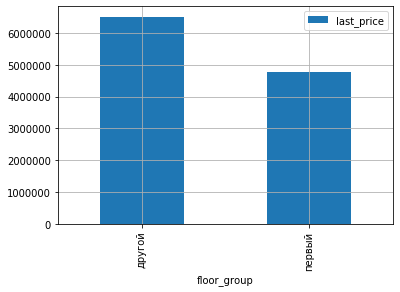

In [107]:
data.pivot_table(index='floor_group', values='last_price').plot(kind='bar', grid=True)

В выборке нет ни одной квартиры на последнем этаже. Из графика видим, что квартиры на первом этаже дешевле.

##### Изучим зависимость цены продажи от даты размещения: дня недели, месяца и года.

День недели:

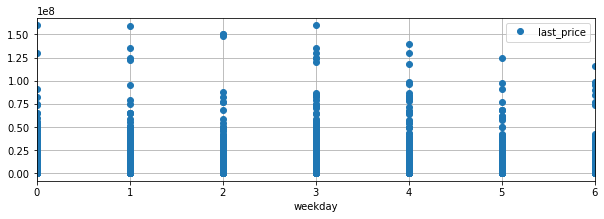

In [108]:
data.plot(x='weekday', y='last_price', style='o', grid=True, figsize=(10, 3))

Месяц:

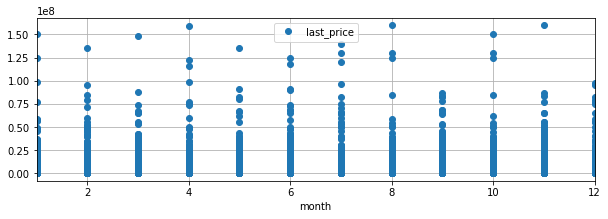

In [109]:
data.plot(x='month', y='last_price', style='o', grid=True, figsize=(10, 3))

Год:

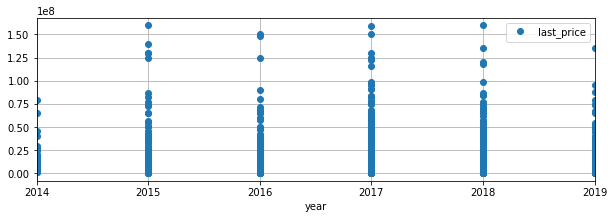

In [110]:
data.plot(x='year', y='last_price', style='o', grid=True, figsize=(10, 3))

##### Посчитаем коэффиценты корреляции:

In [111]:
data['last_price'].corr(data['weekday'])

-0.001983849354751812

In [112]:
data['last_price'].corr(data['month'])

0.0017477949907314136

In [113]:
data['last_price'].corr(data['year'])

-0.04395324717542432

Изучив графики и коэффициент корреляции видим что, нет явной зависимости между ценой продажи днем недели, месяцем и годом.

По графикам видим, что иногда в среду и субботу продавали более дорогие квартиры. В декабре квартиры дороже, чем в остальные месяцы. В 2017 квартиры были дороже. 

##### Выберите 10 населённых пунктов с наибольшим числом объявлений.

Выберем 10 городов с наибольшим числом объявлений:

In [114]:
data.pivot_table(index='locality_name', values='price_per_meter', aggfunc='count').sort_values('price_per_meter', ascending=False).head(10)

,price_per_meter
locality_name,
Санкт-Петербург,15190
посёлок Мурино,505
посёлок Шушары,432
Всеволожск,389
Пушкин,356
Колпино,334
посёлок Парголово,322
Гатчина,296
деревня Кудрово,290


Посчитаем среднюю цену квадратного метра в этих населённых пунктах:

In [115]:
data.query('locality_name in ("Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Пушкин", "Колпино", "посёлок Парголово", "Гатчина", "деревня Кудрово", "Выборг")').groupby('locality_name')['price_per_meter'].mean().sort_values()

locality_name
Выборг                58424.469565
Всеволожск            69028.920308
Гатчина               69208.520270
Колпино               75680.943114
посёлок Шушары        78867.671296
посёлок Мурино        86429.360396
посёлок Парголово     90570.481366
деревня Кудрово       93039.093103
Пушкин               103515.926966
Санкт-Петербург      114512.818433
Name: price_per_meter, dtype: float64

Населённые пункты с самой высокой стоимостью жилья - Санкт-Петербукг, что ожидаемо. С самой низкой стоимостью жилья - Выборг.

##### Изучим предложения квартир.

Выделим квартиры в Санкт-Петербурге:

In [116]:
data.query('locality_name == "Санкт-Петербург"').head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group,price_per_meter,weekday,month,year,floor_group,ratio_living_to _total,ratio_kitchen_to _total
0,13000000,108,2019-03-07,3,2.70,16,51,8,25,Санкт-Петербург,16028,95,100-200,120370,3,3,2019,другой,0.472222,0.231481
2,5196000,56,2015-08-20,2,2.65,5,34,4,8,Санкт-Петербург,13933,558,50-100,92785,3,8,2015,другой,0.607143,0.142857
3,64900000,159,2015-07-24,3,2.65,14,72,9,16,Санкт-Петербург,6800,424,100-200,408176,4,7,2015,другой,0.452830,0.100629
4,10000000,100,2018-06-19,2,3.03,14,32,13,41,Санкт-Петербург,8098,121,50-100,100000,1,6,2018,другой,0.320000,0.410000
7,7915000,71,2019-04-18,2,2.65,24,39,22,18,Санкт-Петербург,11634,95,50-100,111478,3,4,2019,другой,0.549296,0.253521


Проверим количество строк с Санкт-Петербургом в **data** и **drop_cityCenter_data**:

In [117]:
len(data.query('locality_name == "Санкт-Петербург"'))

15190

In [118]:
len(drop_cityCenter_data.query('locality_name == "Санкт-Петербург"'))

15196

Почти весь Санк-Петербург попал в **drop_cityCenter_data**. Значит можно использовать **drop_cityCenter_data**.

(В **drop_cityCenter_data** больше строк, чем в **data**, потому что в data удалены строки с пропущеными значениями из других столбцов, а в drop_cityCenter_data нет).

Создаем столбец с расстоянием до центра в километрах:

In [119]:
drop_cityCenter_data['cityCenters_nearest_km'] = drop_cityCenter_data['cityCenters_nearest'] / 1000

Округлим до целых значений:

In [120]:
drop_cityCenter_data['cityCenters_nearest_km'] = drop_cityCenter_data['cityCenters_nearest_km'].astype('int')

Добавим столбец с ценой за квадратный метр в **drop_cityCenter_data**:

In [121]:
drop_cityCenter_data['price_per_meter'] = drop_cityCenter_data['last_price'] / drop_cityCenter_data['total_area'] 

 Округлим до целых значений:

In [122]:
drop_cityCenter_data['price_per_meter'] = drop_cityCenter_data['price_per_meter'].astype('int')

Посчитаем среднюю цену для каждого километра: 

In [123]:
drop_cityCenter_data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='price_per_meter').sort_values(by='price_per_meter')

,price_per_meter
cityCenters_nearest_km,
29,62481.666667
26,75171.333333
28,82056.888889
24,82439.909091
22,88714.237410
25,91135.600000
21,91482.203125
23,92851.551724
18,94803.767442


Построим график зависимости цены за квадратный метр от удалённости от центра:

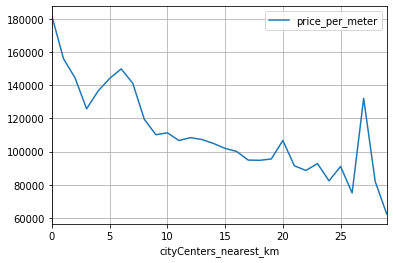

In [124]:
drop_cityCenter_data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='price_per_meter').plot(grid=True)

Из графика видно, что чем ближе к центру тем выше цена квадратного метра. Есть пики цены квадратного метра на 6км и 27км, наверное там элитные жк.

In [125]:
drop_cityCenter_data['cityCenters_nearest_km'].corr(drop_cityCenter_data['price_per_meter'])

-0.34802461235474513

А вот по коэффициенту корреляции зависимость не так очевидна.

График сильно меняется примерно на 3 км — это и будет центральная зона.

####  Выделим сегмент квартир в центре Санкт-Петербурга.

In [126]:
drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"').head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group,cityCenters_nearest_km,price_per_meter
24,6500000.0,97.2,2015-10-31T00:00:00,2,2.65,3.0,46.5,1,19.6,Санкт-Петербург,2336.0,265.0,50-100,2,66872
35,15500000.0,149.0,2017-06-26T00:00:00,5,2.65,5.0,104.0,4,17.0,Санкт-Петербург,3502.0,644.0,100-200,3,104026
99,9600000.0,90.0,2017-09-26T00:00:00,4,2.65,5.0,67.0,2,8.0,Санкт-Петербург,2818.0,104.0,50-100,2,106666
136,6500000.0,51.8,2018-08-01T00:00:00,2,3.45,6.0,25.6,2,7.3,Санкт-Петербург,3618.0,163.0,50-100,3,125482
138,4800000.0,40.0,2017-11-18T00:00:00,2,2.65,3.0,29.0,2,6.0,Санкт-Петербург,2913.0,80.0,20-50,2,120000


In [127]:
len(drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"'))

1094

Таких объявлений у нас 1094.

##### Изучим цену продажи в центре Санкт-Петербурга и сравним с данными во всем городе.

Присвоим **last_price_centr** Series характерных значений для центра города.

In [128]:
last_price_centr = (drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"'))['last_price'].describe()

Присвоим **last_price_all*** series характерных значений для всего города.

In [129]:
last_price_all = (drop_cityCenter_data.query('locality_name == "Санкт-Петербург"'))['last_price'].describe()

Создаем датафрейм с данными для сравнения всего города и центра.

In [130]:
describe_last_price = pd.DataFrame(columns = ['Center', 'All'])
describe_last_price['Center'] = last_price_centr
describe_last_price['All'] = last_price_all

In [131]:
describe_last_price

,Center,All
count,1.094000e+03,1.519600e+04
mean,1.438427e+07,7.683862e+06
std,1.759496e+07,8.513186e+06
min,2.100000e+06,1.219000e+04
25%,6.957500e+06,4.200000e+06
50%,9.400000e+06,5.500000e+06
75%,1.420000e+07,8.000000e+06
max,1.600000e+08,1.600000e+08


Из таблицы видим, что средняя цена продажи в центре города выше, чем во всем городе.
Все остальные характеристики цены в центре тоже больше. Самая дорогая квартира находится в центре города.

##### Изучим общую площадь в центре Санкт-Петербурга и сравним с данными во всем городе.

Проделаем те же манипуляции, что и для цены:

In [132]:
total_area_centr = (drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"'))['total_area'].describe()
total_area_all = (drop_cityCenter_data.query('locality_name == "Санкт-Петербург"'))['total_area'].describe()
describe_total_area = pd.DataFrame(columns = ['Center', 'All'])
describe_total_area['Center'] = total_area_centr
describe_total_area['All'] = total_area_all
describe_total_area

,Center,All
count,1094.000000,15196.000000
mean,95.545165,63.717120
std,53.257140,37.131959
min,12.000000,12.000000
25%,62.000000,41.700000
50%,83.000000,54.700000
75%,113.450000,74.000000
max,517.000000,517.000000


Из полученных данных видим, что в целом квартиры в центре больше по площади.

##### Изучим число комнат в центре Санкт-Петербурга и сравним с данными во всем городе:

Сделаем таблицу для сравнения характеристик.

In [133]:
rooms_centr = (drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"'))['rooms'].describe()
rooms_all = (drop_cityCenter_data.query('locality_name == "Санкт-Петербург"'))['rooms'].describe()
describe_rooms = pd.DataFrame(columns = ['Center', 'All'])
describe_rooms['Center'] = rooms_centr
describe_rooms['All'] = rooms_all
describe_rooms

,Center,All
count,1094.000000,15196.000000
mean,3.046618,2.152474
std,1.399458,1.102921
min,0.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,3.000000
max,9.000000,10.000000


В центре вв среднем по 3 комнаты в квартире, а во всем городе в среднем по 2.

##### Изучим высоту потолков в центре Санкт-Петербурга и сравним с данными во всем городе:
 
 Сделаем таблицу для сравнения характеристик.

In [134]:
ceiling_height_centr = (drop_cityCenter_data.query('(cityCenters_nearest_km < 4) and (locality_name == "Санкт-Петербург") and (2 < ceiling_height < 5)'))['ceiling_height'].describe()
ceiling_height_all = (drop_cityCenter_data.query('(locality_name == "Санкт-Петербург") and (2 < ceiling_height < 5)'))['ceiling_height'].describe()
describe_ceiling_height = pd.DataFrame(columns = ['Center', 'All'])
describe_ceiling_height['Center'] = ceiling_height_centr
describe_ceiling_height['All'] = ceiling_height_all
describe_ceiling_height

,Center,All
count,1094.000000,15192.000000
mean,3.015366,2.718890
std,0.386800,0.236183
min,2.450000,2.300000
25%,2.650000,2.600000
50%,3.000000,2.650000
75%,3.250000,2.750000
max,4.900000,4.900000


В центре потолки выше, чем во всем городе.

##### Выделим факторы, которые влияют на стоимость квартиры .


##### Построим график зависимости стоимости квартиры от числа комнат.

Для центра города:

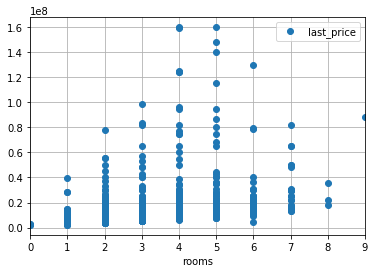

In [135]:
drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"').plot(x='rooms', y='last_price', style='o', grid=True)

Для всего города:

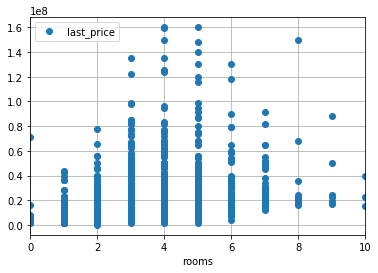

In [136]:
drop_cityCenter_data.query('locality_name == "Санкт-Петербург"').plot(x='rooms', y='last_price', style='o', grid=True)

Посчитаем коэффициент корреляции:

In [137]:
drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"')['last_price'].corr(drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"')['rooms'])

0.3588608942740928

In [138]:
drop_cityCenter_data.query('locality_name == "Санкт-Петербург"')['last_price'].corr(drop_cityCenter_data.query('locality_name == "Санкт-Петербург"')['rooms'])

0.4545001628800201

График зависимости стоимости квартиры от числа комнат для центра такой же по виду как и для всего города.

Коэффициент корреляции для центра 0.35, для всего города 0.45.

###### Построим график зависимости стоимости квартиры от этажа квартиры.


Добавим в drop_cityCenter_data столбец с типом этажа- первый, последний, другой:

In [139]:
drop_cityCenter_data['floor_group'] = drop_cityCenter_data['floor'].apply(floor_group)

Для центра города:

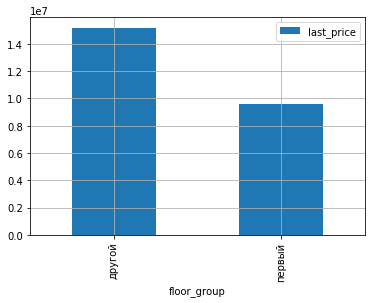

In [140]:
drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"').pivot_table(index='floor_group', values='last_price').plot(kind='bar', grid=True)

Для всего города:

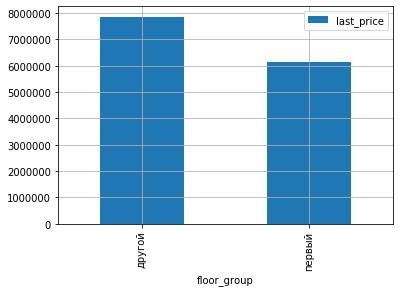

In [141]:
drop_cityCenter_data.query('locality_name == "Санкт-Петербург"').pivot_table(index='floor_group', values='last_price').plot(kind='bar', grid=True)

График зависимости стоимости квартиры от типа этажа для центра такой же по виду как и для всего города.
На первом этаже квартиры дешевле.

##### Построим график зависимости стоимости квартиры от удаленности от центра.

Для центра:

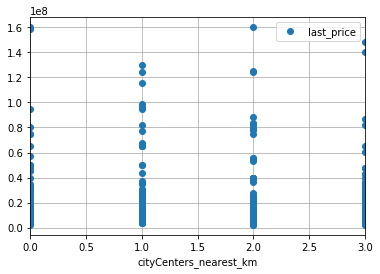

In [142]:
drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"').plot(x='cityCenters_nearest_km', y='last_price', style='o', grid=True)

Для всего города:

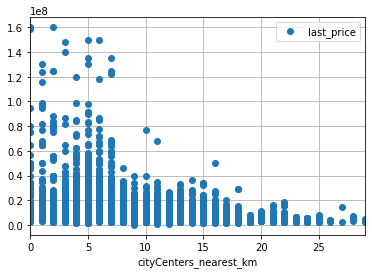

In [143]:
drop_cityCenter_data.query('locality_name == "Санкт-Петербург"').plot(x='cityCenters_nearest_km', y='last_price', style='o', grid=True)

Посчитаем коэффициент корреляции:

In [144]:
drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"')['last_price'].corr(drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"')['cityCenters_nearest_km'])

-0.17763671686779256

In [145]:
drop_cityCenter_data.query('locality_name == "Санкт-Петербург"')['last_price'].corr(drop_cityCenter_data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest_km'])

-0.3414247186037672

График зависимости стоимости квартиры от удаленности от центра для центра заметно отличается от графика для всего города. 

Коэффициент корреляции для центра 0.177, для всего города 0.34. В центре зависимость стоимости квартиры от удаленности от центра ниже, чем по всему городу.

###### Построим график зависимости стоимости квартиры от дня недели, месяца и года размещения объявления.

Переведем столбец 'first_day_exposition' в drop_cityCenter_data в тип datetime64, добавим столбцы с днем недели месяцем и годом:

In [146]:
drop_cityCenter_data['first_day_exposition'] = pd.to_datetime(drop_cityCenter_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
drop_cityCenter_data['weekday'] = drop_cityCenter_data['first_day_exposition'].dt.weekday # добавляем день недели
drop_cityCenter_data['month'] = drop_cityCenter_data['first_day_exposition'].dt.month
drop_cityCenter_data['year'] = drop_cityCenter_data['first_day_exposition'].dt.year

Построим графики зависимости цены продажи от дня недели, месяца и года:

Дла центра:

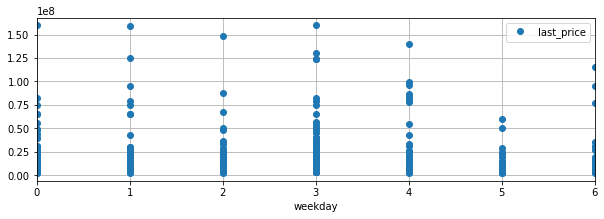

In [147]:
drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"').plot(x='weekday', y='last_price', style='o', grid=True, figsize=(10, 3))

Для всего города:

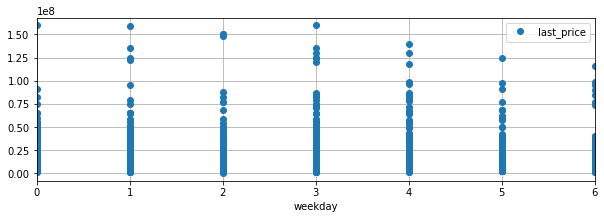

In [148]:
drop_cityCenter_data.query('locality_name == "Санкт-Петербург"').plot(x='weekday', y='last_price', style='o', grid=True, figsize=(10, 3))

Дла центра:

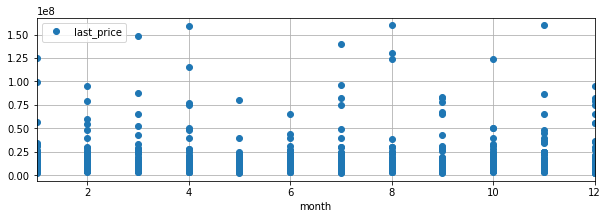

In [149]:
drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"').plot(x='month', y='last_price', style='o', grid=True, figsize=(10, 3))

Для всего города:

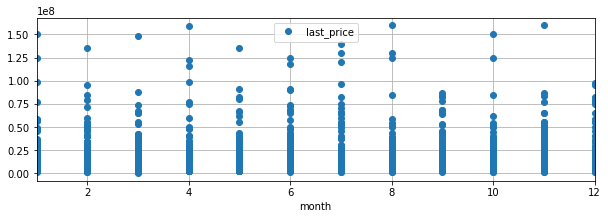

In [150]:
drop_cityCenter_data.query('locality_name == "Санкт-Петербург"').plot(x='month', y='last_price', style='o', grid=True, figsize=(10, 3))

Дла центра:

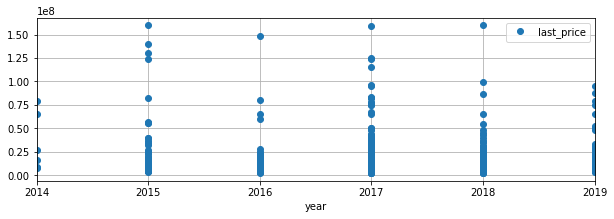

In [151]:
drop_cityCenter_data.query('cityCenters_nearest_km < 4 and locality_name == "Санкт-Петербург"').plot(x='year', y='last_price', style='o', grid=True, figsize=(10, 3))

Для всего города:

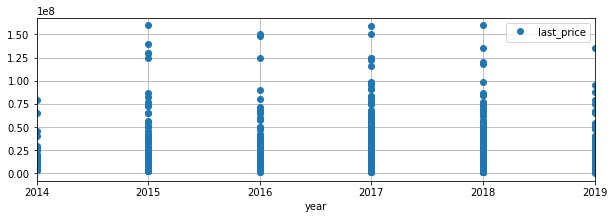

In [152]:
drop_cityCenter_data.query('locality_name == "Санкт-Петербург"').plot(x='year', y='last_price', style='o', grid=True, figsize=(10, 3))

Графики зависимости стоимости квартиры от дня недели, месяца и года для центра города такие же по виду как и для всего города.

In [154]:
data['days_exposition'].describe()

count    22922.000000
mean       147.304467
std        154.539516
min          1.000000
25%         45.000000
50%         95.000000
75%        183.000000
max        799.000000
Name: days_exposition, dtype: float64

In [153]:
data

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,total_area_group,price_per_meter,weekday,month,year,floor_group,ratio_living_to _total,ratio_kitchen_to _total
0,13000000,108,2019-03-07,3,2.70,16,51,8,25,Санкт-Петербург,16028,95,100-200,120370,3,3,2019,другой,0.472222,0.231481
1,3350000,40,2018-12-04,1,2.65,11,18,1,11,посёлок Шушары,18603,81,20-50,83750,1,12,2018,первый,0.450000,0.275000
2,5196000,56,2015-08-20,2,2.65,5,34,4,8,Санкт-Петербург,13933,558,50-100,92785,3,8,2015,другой,0.607143,0.142857
3,64900000,159,2015-07-24,3,2.65,14,72,9,16,Санкт-Петербург,6800,424,100-200,408176,4,7,2015,другой,0.452830,0.100629
4,10000000,100,2018-06-19,2,3.03,14,32,13,41,Санкт-Петербург,8098,121,50-100,100000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000,133,2017-03-21,3,3.70,5,73,3,13,Санкт-Петербург,4232,95,100-200,72932,1,3,2017,другой,0.548872,0.097744
23695,3100000,59,2018-01-15,3,2.65,5,38,4,8,Тосно,NaN,45,50-100,52542,0,1,2018,другой,0.644068,0.135593
23696,2500000,56,2018-02-11,2,2.65,3,29,1,10,село Рождествено,NaN,95,50-100,44642,6,2,2018,первый,0.517857,0.178571
23697,11475000,76,2017-03-28,2,3.00,17,39,12,23,Санкт-Петербург,10364,602,50-100,150986,1,3,2017,другой,0.513158,0.302632


### Шаг 5. Общий вывод

В результате исследования объявлений о продаже можно сделать следующие выводы:

    - в Санкт-Петербукге самые дорогие квартиры
    - средняя цена продажи в центре города выше, чем во всем городе
    - самая дорогая квартира находится в центре города
    - в центре Санкт-Петербурга потолки выше, чем во всем городе
    - в центре Санкт-Петербурга в среднем по 3 комнаты в квартире, а во всем городе в среднем по 2 комнаты
    - в целом квартиры в центре Санкт-Петербурга больше по площади
    - в выборке нет ни одной квартиры на последнем этаже
    - квартиры на первом этаже дешевле во всей выборке
    - в целом, чем ближе к центру города, тем выше цена квадратного метра
    - зависимости стоимости квартиры от удаленности от центра для центра Санкт-Петербурга заметно отличается от всего города. В центре зависимость стоимости квартиры от удаленности от центра ниже, чем по всему городу.   
    - нет явной зависимости между ценой продажи днем недели, месяцем и годом для всей выборки    
    - зависимости стоимости квартиры от числа комнат для центра Санкт-Петербурга такая же как и для всего города
    - в целом, чем больше площадь квартиры, тем больше стоимость. Но не всегда, так как стоимость зависит еще от многих других характеристик
     - среднее время продажи 95 дней. Миниальное время продажи 1 день, максимальное 1580 дней. В основном продавали от 45 до 198 дней